In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [5]:
df=pd.read_csv('Heart_Disease.csv',names=columns, header=0)

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [7]:
df=df.replace({'?':"nan"})

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,nan,nan,nan,0
1,60,1,4,132,218,0,1,140,1,1.5,3,nan,nan,2
2,55,1,4,142,228,0,1,149,1,2.5,1,nan,nan,1
3,66,1,3,110,213,1,2,99,1,1.3,2,nan,nan,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,nan,nan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,nan,nan,nan,1
195,62,1,1,nan,139,0,1,nan,nan,nan,nan,nan,nan,0
196,55,1,4,122,223,1,1,100,0,0,nan,nan,6,2
197,58,1,4,nan,385,1,2,nan,nan,nan,nan,nan,nan,0


In [10]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list1 = ['trestbps','chol','fbs','thalach','exang','oldpeak','slope','ca','thal']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))

In [12]:
df.dtypes

age         int64
sex         int64
cp          int64
trestbps    int32
chol        int32
fbs         int32
restecg     int64
thalach     int32
exang       int32
oldpeak     int32
slope       int32
ca          int32
thal        int32
num         int64
dtype: object

In [13]:
df=df.replace(np.nan,df.mean())

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,17,28,0,1,21,0,1,3,1,3,0
1,60,1,4,18,35,0,1,30,1,6,2,1,3,2
2,55,1,4,24,45,0,1,35,1,10,0,1,3,1
3,66,1,3,5,31,1,2,58,1,5,1,1,3,0
4,66,1,3,10,0,0,1,14,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,15,91,1,1,38,0,1,3,1,3,1
195,62,1,1,40,2,0,1,59,2,14,3,1,3,0
196,55,1,4,11,40,1,1,0,0,1,3,1,1,2
197,58,1,4,40,97,1,2,59,2,14,3,1,3,0


In [15]:
df.shape

(199, 14)

In [16]:
df.num.value_counts()

1    56
0    51
3    42
2    40
4    10
Name: num, dtype: int64

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [18]:
#No null values is present.

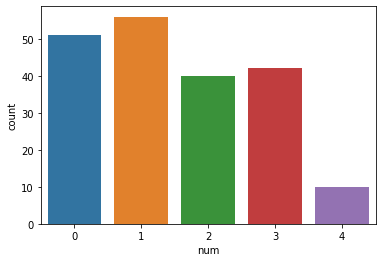

In [19]:
#Lets check the count of each class in taret variables.
sns.countplot(x='num',data=df)
plt.show()

In [20]:
#Lets describe the matrix
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,24.768844,37.532663,0.412060,0.733668,33.552764,1.005025,7.914573,2.090452,0.989950,2.748744,1.517588
std,7.827080,0.171433,0.796928,12.570080,32.270600,0.560533,0.684918,20.795687,0.728202,5.020940,1.045365,0.099997,0.625377,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,14.000000,1.500000,0.000000,0.000000,14.000000,0.000000,4.000000,1.000000,1.000000,3.000000,0.000000
50%,60.000000,1.000000,4.000000,24.000000,34.000000,0.000000,1.000000,30.000000,1.000000,9.000000,3.000000,1.000000,3.000000,1.000000
75%,64.000000,1.000000,4.000000,40.000000,62.500000,1.000000,1.000000,59.000000,2.000000,14.000000,3.000000,1.000000,3.000000,3.000000
max,77.000000,1.000000,4.000000,40.000000,99.000000,2.000000,2.000000,59.000000,2.000000,14.000000,3.000000,1.000000,3.000000,4.000000


In [21]:
#Let's check the correlation matrix
dfcor = df.corr()
dfcor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.033837,-0.039809,0.148520,0.074139,0.058483,0.001487,-0.043703,0.083000,0.092355,-0.004302,0.023639,0.090367,0.286630
sex,0.033837,1.000000,0.037525,0.041280,-0.136759,-0.027732,0.060305,0.004698,0.041676,0.102608,0.043477,-0.017766,0.023199,0.147190
cp,-0.039809,0.037525,1.000000,-0.108338,0.101086,-0.047554,0.033617,-0.242664,-0.082699,-0.193695,-0.182148,-0.063058,-0.089931,0.167202
trestbps,0.148520,0.041280,-0.108338,1.000000,0.138332,0.047276,0.060275,0.536294,0.692578,0.597693,0.403247,0.042340,0.202020,0.090024
chol,0.074139,-0.136759,0.101086,0.138332,1.000000,0.069612,0.017190,0.127242,0.131201,0.096692,0.063839,0.115919,0.007166,0.137947
fbs,0.058483,-0.027732,-0.047554,0.047276,0.069612,1.000000,0.116281,0.044052,-0.104084,-0.025114,0.022263,0.074257,-0.048942,0.048351
restecg,0.001487,0.060305,0.033617,0.060275,0.017190,0.116281,1.000000,0.056130,-0.017555,-0.044834,0.125517,0.034462,-0.039106,-0.033597
thalach,-0.043703,0.004698,-0.242664,0.536294,0.127242,0.044052,0.056130,1.000000,0.563115,0.543747,0.375447,0.068260,0.101606,-0.132942
exang,0.083000,0.041676,-0.082699,0.692578,0.131201,-0.104084,-0.017555,0.563115,1.000000,0.710123,0.331130,0.000697,0.235682,0.070843
oldpeak,0.092355,0.102608,-0.193695,0.597693,0.096692,-0.025114,-0.044834,0.543747,0.710123,1.000000,0.200663,0.038518,0.271392,0.147174


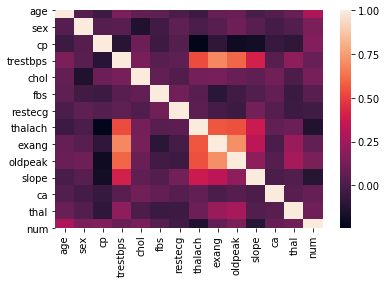

In [22]:
#Checking correlation with the help of heatmap.
sns.heatmap(dfcor)

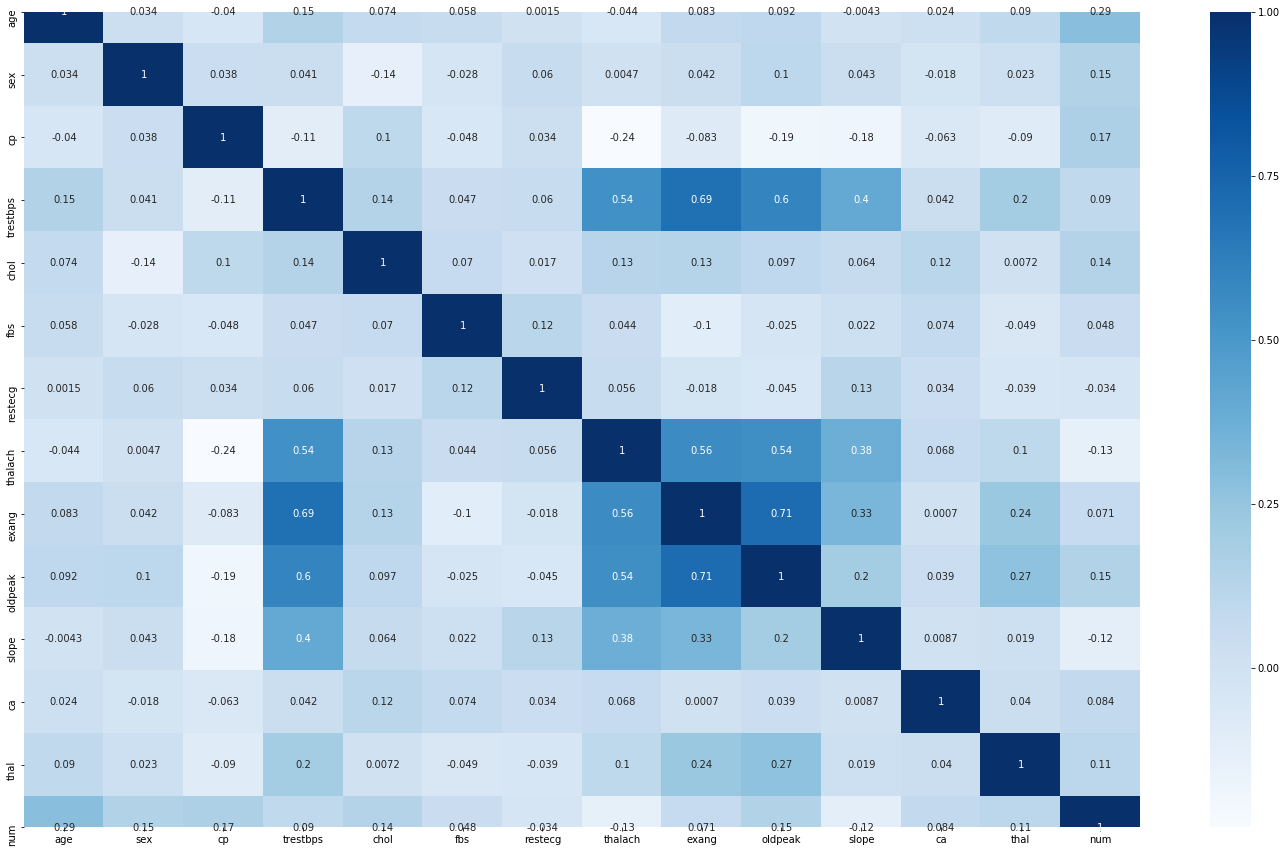

In [23]:
plt.figure(figsize = (25,15))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

In [76]:
#num and age is very positively correlated

In [24]:
collist=df.columns.values
ncol=15
nrows=15

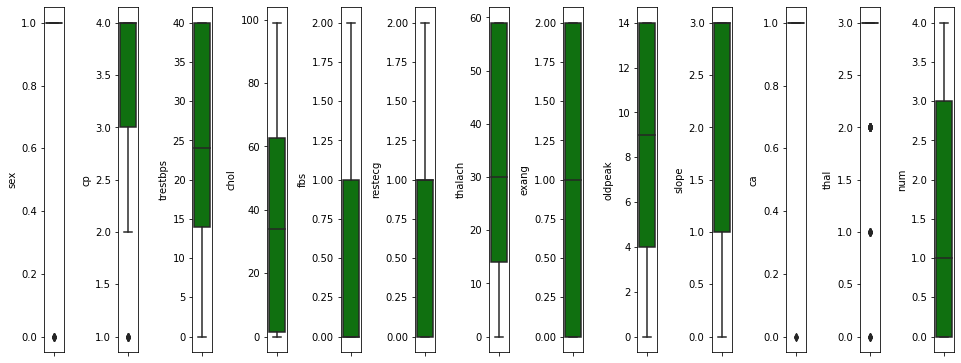

In [25]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

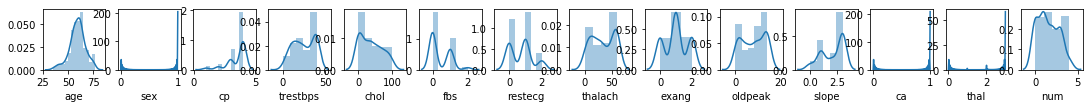

In [26]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [27]:
#lets check the skewness
df.skew()

age        -0.397178
sex        -5.537073
cp         -1.641267
trestbps   -0.127124
chol        0.372450
fbs         0.960949
restecg     0.396540
thalach    -0.057023
exang      -0.007701
oldpeak    -0.116227
slope      -0.611222
ca         -9.898728
thal       -2.763281
num         0.302681
dtype: float64

In [28]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [29]:
#lets again check the skewness
df.skew()

age        -0.397178
sex        -5.537073
cp         -1.641267
trestbps   -0.127124
chol        0.372450
fbs         0.671074
restecg     0.396540
thalach    -0.057023
exang      -0.007701
oldpeak    -0.116227
slope      -0.611222
ca         -9.898728
thal       -2.763281
num         0.302681
dtype: float64

In [30]:
#Now treating the outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.96373685, 0.17631813, 0.62583065, ..., 0.10075854, 0.40278073,
        1.24498245],
       [0.08560374, 0.17631813, 0.62583065, ..., 0.10075854, 0.40278073,
        0.39575601],
       [0.5548152 , 0.17631813, 0.62583065, ..., 0.10075854, 0.40278073,
        0.42461322],
       ...,
       [0.5548152 , 0.17631813, 0.62583065, ..., 0.10075854, 2.80335388,
        0.39575601],
       [0.17056384, 0.17631813, 0.62583065, ..., 0.10075854, 0.40278073,
        1.24498245],
       [0.34177131, 0.17631813, 1.89013499, ..., 0.10075854, 0.40278073,
        0.42461322]])

In [31]:
threshold = 3
print(np.where(z>3))

(array([ 11,  27,  38,  50,  65,  71,  75,  78,  95,  96, 125, 127, 130,
       132, 136, 170, 188, 189, 193, 194, 195], dtype=int64), array([12, 11, 11,  1,  2,  2,  2,  1,  0,  2,  1,  1,  2,  2,  2, 12, 12,
        1, 12,  1,  2], dtype=int64))


In [32]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,17,28,0.000000,1,21,0,1,3,1,3,0
1,60,1,4,18,35,0.000000,1,30,1,6,2,1,3,2
2,55,1,4,24,45,0.000000,1,35,1,10,0,1,3,1
3,66,1,3,5,31,0.693147,2,58,1,5,1,1,3,0
4,66,1,3,10,0,0.000000,1,14,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,53,1,4,25,83,0.693147,1,22,1,6,1,1,3,3
192,62,1,4,32,9,0.000000,1,29,1,1,3,1,3,1
196,55,1,4,11,40,0.693147,1,0,0,1,3,1,1,2
197,58,1,4,40,97,0.693147,2,59,2,14,3,1,3,0


In [33]:
df.shape

(199, 14)

In [34]:
df_new.shape

(178, 14)

Now lets train and test our data. Here our target variable is y i.e num, and our input variables is x

In [35]:
x=df_new.iloc[:,0:-1]

In [36]:
df1=x

In [37]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,44,1,4,17,28,0.000000,1,21,0,1,3,1,3
1,60,1,4,18,35,0.000000,1,30,1,6,2,1,3
2,55,1,4,24,45,0.000000,1,35,1,10,0,1,3
3,66,1,3,5,31,0.693147,2,58,1,5,1,1,3
4,66,1,3,10,0,0.000000,1,14,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,53,1,4,25,83,0.693147,1,22,1,6,1,1,3
192,62,1,4,32,9,0.000000,1,29,1,1,3,1,3
196,55,1,4,11,40,0.693147,1,0,0,1,3,1,1
197,58,1,4,40,97,0.693147,2,59,2,14,3,1,3


In [38]:
y=df_new[['num']]

In [39]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
191,3
192,1
196,2
197,0


In [40]:
#Scaling the input variable
#Linearregression algorithm requires all features to be on common scale

In [41]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [43]:
x_train.shape

(119, 13)

In [44]:
y_train.shape

(119, 1)

In [45]:
x_test.shape

(59, 13)

In [46]:
y_test.shape

(59, 1)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gd_sr = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
0.3258426966292135


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_features ='sqrt',max_depth = 5,criterion='gini')

rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.3559322033898305
[[ 5  7  0  2  0]
 [ 3 10  2  1  0]
 [ 0  8  0  7  0]
 [ 3  3  0  6  0]
 [ 1  0  0  1  0]]
              precision    recall  f1-score   support

           0       0.42      0.36      0.38        14
           1       0.36      0.62      0.45        16
           2       0.00      0.00      0.00        15
           3       0.35      0.50      0.41        12
           4       0.00      0.00      0.00         2

    accuracy                           0.36        59
   macro avg       0.23      0.30      0.25        59
weighted avg       0.27      0.36      0.30        59



In [ ]:
#Cross Validating to avoid overfitting and under fitting of the model.

In [50]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.2972973  0.27777778 0.27777778 0.37142857 0.26470588]
0.29779746132687307
0.03825811965234233


In [51]:
#So we save this model

In [52]:
from sklearn.externals import joblib
joblib.dump(rf,'rfhrattrition.obj')
rf_from_joblib = joblib.load('rfhrattrition.obj')
rf_from_joblib.predict(x_test) 

array([0, 1, 3, 0, 3, 0, 0, 0, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 3,
       3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 0, 2, 3, 3, 1, 1, 1, 2,
       1, 3, 0, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 0, 0], dtype=int64)